# **Sentiment Analysis with RNN and LSTM**


### Network Architecture
The architecture of the network is shown below:

>**Pass words to an embedding layer:** A

>**Pass new embedding to LSTM:** B

>**Output using Sigmoid layer:** We're using a sigmoid function because positive and negative = 1 and 0, respectively, and a sigmoid will output predicted, sentiment values between 0-1. 



#### **Import Data**

In [0]:
import numpy as np

# reading data
with open('message_final.txt', 'r') as f:
    message = f.read()
    
with open('labels_final.txt', 'r') as f:
    labels = f.read()

#### **Data Pre-Processing**
The first step when building a neural network model is getting your data into the proper form to feed into the network. Since we're using embedding layers, we'll need to encode each word with an integer. We'll also want to clean it up a bit.

List of pre-processing step:
>* Get rid of periods and extraneous punctuation.
>* Split the text using '\n' and combine all review to one string.


In [0]:
# importing necessary libraries
from string import punctuation

def feature_data_preprocessing(message):
  """
  Pre-processing feature data i.e. converting to lowercase, getting rid of punctuation and splitting new lines.

  INPUT:
  message: string: spam message from the dataset.  

  OUTPUT:   
  message_split: string :
  """

  print("Starting data preprocessing ...")
  
  # converting to lower case
  message = message.lower()

  # get rid of punctation 
  all_text = ''.join([c for c in message if c not in punctuation])
  # all_text = all_text.replace('\n', ' \n ')

  # split by new lines and spaces
  message_split = all_text.split('\n')
  return message_split


In [0]:
# data pre-processing feature i.e. message 
message_split = feature_data_preprocessing(message)

Starting data preprocessing ...


#### **Encoding reviews and labels**

The embedding lookup requires that we pass in integers to our network. The easiest way to do this is to create dictionaries that map the words in the vocabulary to integers. Then we can convert each of our reviews into integers so they can be passed into the network.

> **Encoding Reviews:** Labels are either 'positive' or 'negative'. And we will convert them to 0 and 1 to use in out network.

> **Encoding Labels:** Labels are either 'positive' or 'negative'. And we will convert them to 0 and 1 to use in out network.



In [0]:
def convert_to_array(message_split, labels):
  """
  Encoding reviews and labels that maps the reviews to integers.

  INPUT
  message_split: movie review 
  labels: movie review label

  OUTPUT
  encoded_message: encoded movie review
  encoded_label: encode movie label

  """

  # converting message to array
  encoded_message = np.asarray(message_split)

  # converting labels to array
  labels_split = labels.split()
  encoded_labels = np.asarray(labels_split, dtype=np.int64)

  print("Length of message :", len(encoded_message))
  print("Length of labels:", len(encoded_labels))

  return encoded_message, encoded_labels

In [0]:
# convert features and targets to array
encoded_message, encoded_labels = convert_to_array(message_split, labels)

Length of message : 5572
Length of labels: 5572


##### **Data Visualization**

Here we will see the which words are most repeated in our dataset.

In [0]:
# importing libraries
import collections 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# counting the frequency of each word
def word_frequency(message_split):
  """
  Counts the repeatation of each word in the given string.

  INPUTS:
  message_split: string: spam message from the dataset.  

  OUTPUTS:
  """
  print("Calculating word and its frequency ...")
  wordcount = collections.defaultdict(int)
  message_split = ''.join(message_split)
  for w in message_split.split():
    wordcount[w] += 1
  

  # plotting word frequency
  wc = WordCloud().generate_from_frequencies(wordcount)
  plt.figure(figsize=(10,8), facecolor='k')
  plt.imshow(wc)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()


# plotting the frequency of each word using wordcloud
# def plot_word_frequency(wordcount):
  """
  Plots the frequency of each words using WordCloud

  INPUT:
  wordcount: dict : collection of words and its frequency 

  OUTPUT:
  """
  print("Plotting frequency of each word ...")
  # wc = WordCloud().generate_from_frequencies(wordcount)
  # plt.figure(figsize=(10,8), facecolor='k')
  # plt.imshow(wc)
  # plt.axis('off')
  # plt.tight_layout(pad=0)
  # plt.show()

Calculating word and its frequency ...


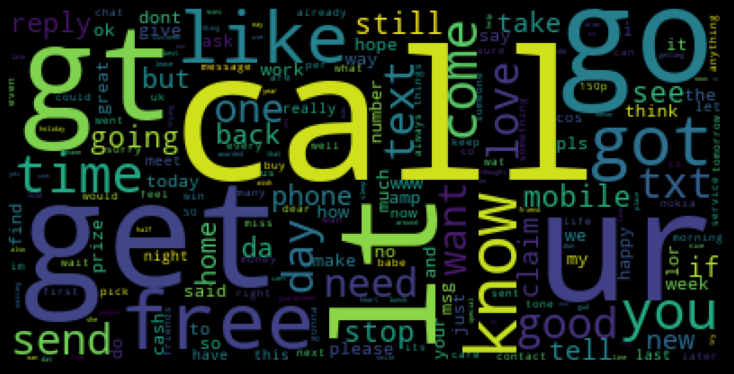

Plotting frequency of each word ...


In [0]:
# Calculating frequency of each word
word_frequency(message_split)

#### **Tokenization**
Tokenization chops each word and assigns unique token. It can be easily set in Keras. `keras.preprocessing.text.Tokenizer()` does all the work for tokenization. A bunch of integers corresponding to word is generated which is then managed through padding.

#### **Padding Sequence**
To deal with both long and short reviews, we will either truncate or pad the length of review. In this case, we will use `maxlen` of  100.
>  If review is shorter than `maxlen`, we will pad with 0 and if it larger than `maxlen` we will truncate to `maxlen`.


In [0]:
# importing libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def prepare_dataset(encoded_message, maxlen):
  """
  Tokenization and padding of words

  INPUT:
  encoded_message: encoded review  

  OUTPUT:
  maxlen: padding seqeunce length
  """

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(encoded_message)
  sequences = tokenizer.texts_to_sequences(encoded_message)

  word_index = tokenizer.word_index
  print("Found {0} unique words: ".format(len(word_index)))

  features = pad_sequences(sequences, maxlen=500)
  print("Data shape: ", features.shape)
  
  return features


Using TensorFlow backend.


In [0]:
# setting value for maxlen
maxlen=500

# calling prepare dataset function
features = prepare_dataset(encoded_message, maxlen)

Found 8650 unique words: 
Data shape:  (5572, 500)


#### Splitting dataset
We will split dataset into training and testing set. 80% of data is used in training set while remaining is used in testing set.

          			Feature Shapes:
    Train set: 		(4457, 500) 
    Test set: 		(1115, 500)


In [0]:
def train_test_split(features,encoded_labels, split_frac):
  """
  Splits dataset into training, testing and validation set.
  INPUT:
  features: :  
  encode_labels:
  split_frac: float : 

  OUTPUT:
  train_x, test_x, train_y, test_y: : 
  """

  # split fraction 
  split_frac = split_frac

  ## split data into training, validation, and test data (features and labels, x and y)
  split_idx = int(len(features)*split_frac)
  train_x, test_x = features[:split_idx], features[split_idx:]
  train_y, test_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

  ## print out the shapes of your resultant feature data
  print("\t\t\tFeature Shapes:")
  print("Train set: \t\t{}".format(train_x.shape), 
        "\nTest set: \t\t{}".format(test_x.shape))
  
  return train_x, train_y, test_x, test_y

In [0]:
# split_frac
split_frac = 0.8

# calling train_test_split
train_x, train_y, test_x, test_y = train_test_split(features,encoded_labels, split_frac)

			Feature Shapes:
Train set: 		(4457, 500) 
Test set: 		(1115, 500)


#### Build Model

The layers are as follows:
1. Embedding Layer
2. LSTM layer 
3. Dense layer
4. Sigmoid activation layer
 
---
 
#### Compile Model

Training hyparameters:

* `lr`: Learning rate for our optimizer.
* `epochs`: Number of times to iterate through the training dataset.


In [0]:
# importing libraries
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

def make_model( vocab_size,output_size, embeding_dim, dropout):
  """

  INPUT:
  train_x : training set for x 
  train_y : testing set for x
  embedding_dim : Embedding dimension size
  output_layer : Number of output layer
  dropout : dropout regularization
  
  OUTPUT:
  model : object 
  """

  print('Building model... \n')
  
  model = Sequential()
  
  model.add(Embedding(vocab_size, embedding_dim))
  
  model.add(LSTM(embedding_dim, dropout=dropout, recurrent_dropout=0.2))
  
  model.add(Dense(output_size, activation='sigmoid'))

  # summary of the model
  model.summary()

  return model


In [0]:
# Initializing the model

vocab_size = len(features) + 1
output_size = 1
embedding_dim = 400
dropout = 0.2

model = make_model(vocab_size, output_size, embedding_dim, dropout)


Building model... 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 400)         2229200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 400)               1281600   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 401       
Total params: 3,511,201
Trainable params: 3,511,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
def compile_model(model, train_x, train_y):
  """

  INPUT
  model : object : deep learning model
  train_x : training set x
  train_y : training set y

  OUTPUT
  """
  epochs = 2
  batch_size = 60
  validation_split = 0.2

  print("Training model ... ")
    
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
  
  history_ltsm = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    
  return history_ltsm  


In [0]:
# Fitting a model
history_ltsm = compile_model(model,train_x, train_y)

Training model ... 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/2
3565/3565 [==============================] - 57s 16ms/step - loss: 0.2014 - acc: 0.9181 - val_loss: 0.1126 - val_acc: 0.9675
Epoch 2/2
3565/3565 [==============================] - 55s 15ms/step - loss: 0.0377 - acc: 0.9896 - val_loss: 0.0619 - val_acc: 0.9821


In [0]:
def evaluate_model(model, test_x, test_y):
  """

  INPUT
  model : object : deep learning model
  test_x : testing set x
  test_y : testing set y
  
  OUPUT
  """
  
  print("Evaluating the model . . .")
  
  result = model.evaluate(test_x, test_y)
  
  # extract those
  loss = result[0]
  accuracy = result[1]
  
  print(f"[+] Accuracy: {accuracy*100:.2f}%")


In [0]:
# Evaluating the performance of model
evaluate_model(model, test_x, test_y)

Evaluating the model . . .
1115/1115 [==============================] - 3s 2ms/step
[+] Accuracy: 98.74%


#### Testing 

Steps for testing:
* For test review, perform data preprocessing `feature_data_processing(review)` 
* Pre-processed data is converted to array `convert_to_array(message_split, labels)`
* Encode review using tokenization and padding `prepare_dataset(encoded_message, maxlen)`
* Make prediction using `model.predit()`


In [0]:
# sentiment classification
test_review_neg = 'Hi man, I was wondering if we can meet tomorrow.'

In [0]:
# 1. feature_data_processing(message)
# 2. convert_to_array(message_split, labels)
# 3. prepare_dataset(encoded_message, maxlen)

# data processing 
test_review = feature_data_preprocessing(test_review_neg)

# converting to array
test_review = np.asarray(test_review)

# preparing data
test_review = prepare_dataset(test_review, 500)

# printing prepared data
print(test_review)

Starting data preprocessing ...
Found 10 unique words: 
Data shape:  (1, 500)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0

In [0]:
import numpy as np

# Making prediction
prediction = model.predict(test_review)[]
prediction
# print(np.around(prediction, decimals=3))

IndexError: ignored

In [0]:
prediction = model.predict(test_review)[0]
prediction
np.argmax(prediction)


0